# Workshop for her 2021.2 - Introdução à Finanças Quantitativas 

[add intro]

## 0. Pandas
[add explicação Pandas]

### Criando dados
Dois tipos de objetos principais no pandas: DataFrame e Series

Um DataFrame é um tabela. Ele contém um array de entradas individuais, cada uma com um certo valor. Cada entrada corresponde a uma linha (row) e uma coluna (column)

In [2]:
import pandas as pd

In [3]:
pd.DataFrame({'Sim' : [50, 100],
             'Não': [10, 20]})

,Sim,Não
0,50,10
1,100,20


In [4]:
pd.DataFrame({'Vitoria': ['Gostei', 'Não gostei'],
             'Letícia': ['Legal', 'Não gostei']})

,Vitoria,Letícia
0,Gostei,Legal
1,Não gostei,Não gostei


O `pd.DataFrame` gera objetos do tipo DataFrame. 

Para declararmos um DataFrame, utilizamos um dicionário cujas chaves são os nomes das colunas (ex: Bob e Sue) e os valores são uma lista de entradas

In [7]:
pd.DataFrame({'Vitoria': ['Gostei', 'Não gostei'],
             'Letícia': ['Legal', 'Não gostei']},
            index = ['Produto A', 'Produto B'])

,Vitoria,Letícia
Produto A,Gostei,Legal
Produto B,Não gostei,Não gostei


Podemos acessar colunas específicas com a seguinte sintaxe:

In [8]:
dataframe = pd.DataFrame({'Vitoria': ['Gostei', 'Não gostei'],
             'Letícia': ['Legal', 'Não gostei']},
            index = ['Produto A', 'Produto B'])

In [9]:
dataframe.Vitoria

Produto A        Gostei
Produto B    Não gostei
Name: Vitoria, dtype: object

In [10]:
dataframe['Vitoria']

Produto A        Gostei
Produto B    Não gostei
Name: Vitoria, dtype: object

Um panda Series é uma sequência de valores. Se o DataFrame é uma tabela, uma Series é uma lista

In [6]:
pd.Series([1, 2, 3, 4, 5, 6])

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

## 1. Importando dados históricos 
[add descrição]


In [23]:
import investpy as inv

In [31]:
mglu = inv.get_stock_historical_data(stock='MGLU3',
                              country='Brazil',
                              from_date='01/01/2018',
                              to_date='01/01/2021')

In [32]:
# Usamos o método .head() para ver as 5 primeiras linhas do dataframe
mglu.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-01-02,2.50,2.54,2.42,2.45,59427200,BRL
2018-01-03,2.44,2.51,2.39,2.42,41385600,BRL
2018-01-04,2.47,2.49,2.45,2.48,47936000,BRL
2018-01-05,2.48,2.50,2.42,2.43,30684800,BRL
2018-01-08,2.42,2.47,2.42,2.43,28796800,BRL


In [40]:
# E o método .tail() para ver as 5 últimas linhas do dataframe
mglu.tail()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-12-22,25.26,25.39,24.82,25.13,25223000,BRL
2020-12-23,25.22,25.60,24.94,24.94,20558600,BRL
2020-12-28,24.75,25.30,24.37,25.22,23099100,BRL
2020-12-29,25.20,25.53,24.99,25.25,17789700,BRL
2020-12-30,25.37,25.66,24.95,24.95,19188700,BRL


Vamos montar uma carteira com 5 ações e selecionar apenas os preços de fechamento

In [35]:
df = pd.DataFrame()

tickers = ['VALE3', 'ITUB4', 'ABEV3', 'PETR4']
for i in tickers:
    prices = inv.get_stock_historical_data(stock = i, country='Brazil', from_date='01/01/2018', to_date='01/01/2021')['Close']
    df[i] = prices

df['MGLU3'] = mglu['Close']

In [36]:
df.head()

,VALE3,ITUB4,ABEV3,PETR4,MGLU3
Date,,,,,
2018-01-02,40.10,23.99,21.00,15.88,2.45
2018-01-03,39.86,24.15,21.05,16.02,2.42
2018-01-04,40.02,24.66,20.94,16.05,2.48
2018-01-05,40.64,24.73,21.01,16.15,2.43
2018-01-08,41.55,24.65,20.98,16.34,2.43


Para visualizarmos rapidamente a evolução dos preços, podemos usar o método `.plot()` do próprio pandas

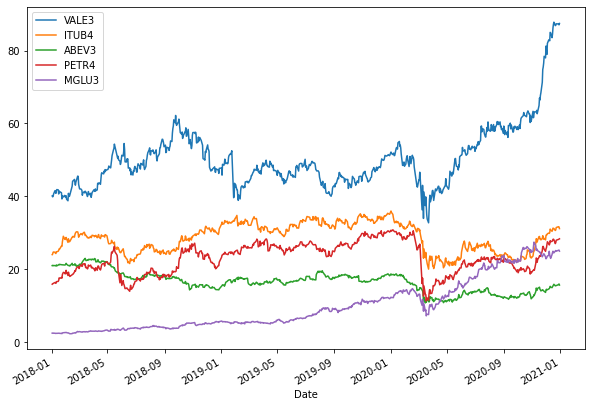

In [39]:
df.plot(figsize=(10, 7));

## 2. Retorno e risco 
[add descrição] 

In [65]:
import numpy as np
import matplotlib.pyplot as plt 

### 2.1. Retorno
#### Retorno simples
[add fórmula e explicação]

In [46]:
df.pct_change().head()

,VALE3,ITUB4,ABEV3,PETR4,MGLU3
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.005985,0.006669,0.002381,0.008816,-0.012245
2018-01-04,0.004014,0.021118,-0.005226,0.001873,0.024793
2018-01-05,0.015492,0.002839,0.003343,0.006231,-0.020161
2018-01-08,0.022392,-0.003235,-0.001428,0.011765,0.000000


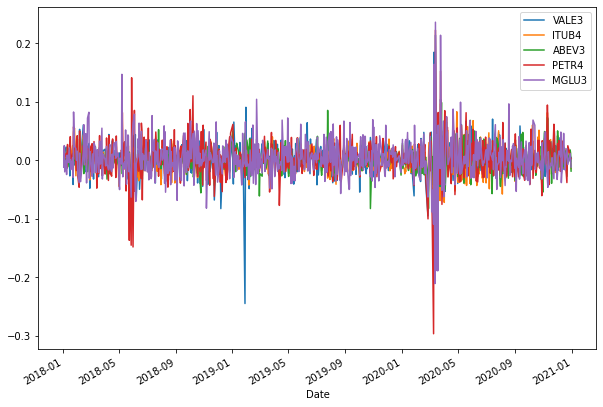

In [48]:
df.pct_change().plot(figsize=(10, 7));

Retorno do portfólio

In [85]:
r = df.pct_change() #retornos do ativo
w = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #pesos
R = np.dot(r, w) #retorno do portfólio

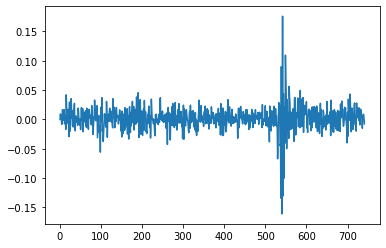

In [67]:
plt.plot(R);

#### Retorno cumulativo
[add fórmula e descrição]

In [59]:
cum_return = np.cumprod(1 + df.pct_change()) - 1
cum_return.head()

,VALE3,ITUB4,ABEV3,PETR4,MGLU3
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.005985,0.006669,0.002381,0.008816,-0.012245
2018-01-04,-0.001995,0.027928,-0.002857,0.010705,0.012245
2018-01-05,0.013466,0.030846,0.000476,0.017003,-0.008163
2018-01-08,0.036160,0.027511,-0.000952,0.028967,-0.008163


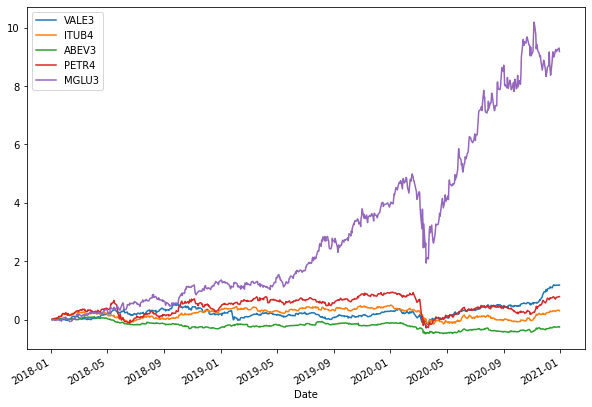

In [57]:
cum_return.plot(figsize = (10,7));

In [73]:
cum_return_portoflio = np.cumprod(1 + R[1:]) - 1

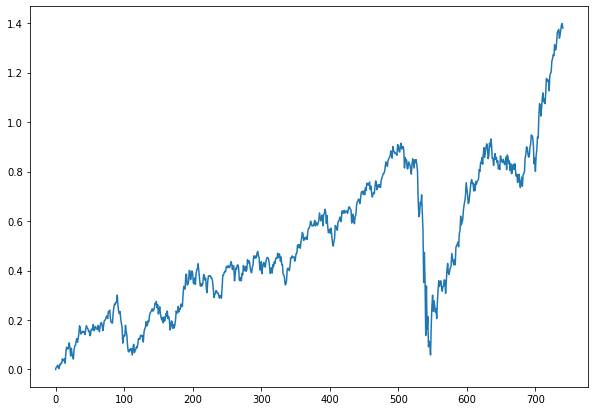

In [77]:
plt.figure(figsize = (10, 7))
plt.plot(cum_return_portoflio);

### 2.2. Risco

#### Risco de uma ação

In [60]:
df.std()

VALE3    8.832694
ITUB4    3.936337
ABEV3    2.851926
PETR4    4.265818
MGLU3    6.951106
dtype: float64

#### Risco de uma carteira

In [80]:
r = df.pct_change()

# média dos retornos anualizados 
mean_returns = r.mean() * 252

# matriz de covariância 
covariance = np.cov(r[1:].T)

In [86]:
vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

In [87]:
vol

0.329888076500129

## 3. Sharpe Ratio 

[add Teoria, bla bla bla, fórmula]

In [97]:
risk_free = 0

mean_returns = r.mean() * 252

R = np.dot(mean_returns, w)

sharpe = (R - risk_free) / vol

In [98]:
sharpe

1.060625780914644

## 4. Teoria Moderna do Portfólio de Harry Markowitz

[add descrição]

### 4.1. Simulando Portfólios

In [100]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
   
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

In [102]:
wallets = generate_wallets(df)

Vamos selecionar o portfólio com maior sharpe ratio

In [104]:
def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

In [105]:
best_portfolio(wallets)

array([0.07395392, 0.05262791, 0.00938415, 0.11820766, 0.74582637])

Vamos comparar os retornos com o nosso portfólio anterior:

In [106]:
new_weights = np.array([0.07395392, 0.05262791, 0.00938415, 0.11820766, 0.74582637])

In [108]:
new_portfolio = np.dot(r, new_weights)
new_cum_returns = np.cumprod(1 + new_portfolio[1:]) - 1

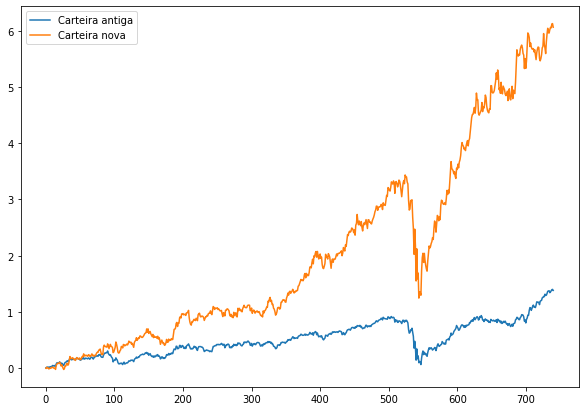

In [110]:
plt.figure(figsize = (10, 7))
plt.plot(cum_return_portoflio, label = 'Carteira antiga')
plt.plot(new_cum_returns, label = 'Carteira nova')
plt.legend();

### 4.2. A fronteira eficiente

In [113]:
def plot_efficient_frontier(wallets):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.colorbar(label = 'Sharpe Ratio')
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

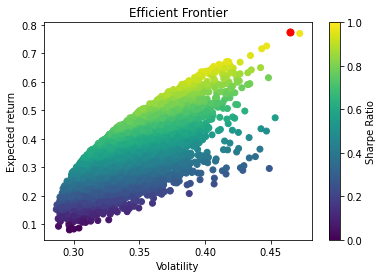

In [114]:
plot_efficient_frontier(wallets)

### 4.3. Afinal, o que é um portfólio eficiente?

In [115]:
def best_portfolio(wallets, method = 'sharpe_ratio'):
    
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']
    
    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()

    elif method == 'volatility':

        indice = np.array(vol).argmin()

    elif method == 'return':

        indice = np.array(returns).argmax()

    return weights[indice]

In [116]:
def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':

        indice = np.array(vol).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return': 

        indice = np.array(returns).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()